In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot
%matplotlib inline

# Insider Threat Data

## HTTP Data

In [2]:
def get_http_sample():
    names = ['id', 'date', 'user', 'pc', 'url']
    df = pd.read_csv('data/insider_threat/r1/http.csv', names=names)
    df['date'] = pd.to_datetime(df.date, errors='coerce')
    df.set_index('date', inplace=True)
    return df

In [3]:
http_df = get_http_sample()
http_df.head()

,id,user,pc,url
date,,,,
2010-01-04 07:08:47,{M8H9-W9NL75TH-1322KOLO},DTAA/AMA0606,PC-1514,http://cnet.com
2010-01-04 07:35:19,{V0E1-R0FE91SC-2381GTDZ},DTAA/DBM0698,PC-1444,http://force.open.com
2010-01-04 07:40:40,{V7C8-H6KA39YG-3352HMOW},DTAA/HBF0035,PC-0991,http://tendencystem.org
2010-01-04 07:52:25,{O9P7-D9DL54YQ-9903OMYE},DTAA/SVC0175,PC-3384,http://bent.cup.org
2010-01-04 07:55:50,{L3J0-E4RF05KN-7341OQVW},DTAA/CMU0028,PC-4253,http://taxpotato.east.org


In [4]:
# df.set_index('date', inplace=True)
http_df.shape

(3451665, 4)

In [5]:
http_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3451665 entries, 2010-01-04 07:08:47 to 2011-05-14 06:10:53
Data columns (total 4 columns):
id      object
user    object
pc      object
url     object
dtypes: object(4)
memory usage: 131.7+ MB


### Aggregate Activity

In [6]:
daily = http_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()

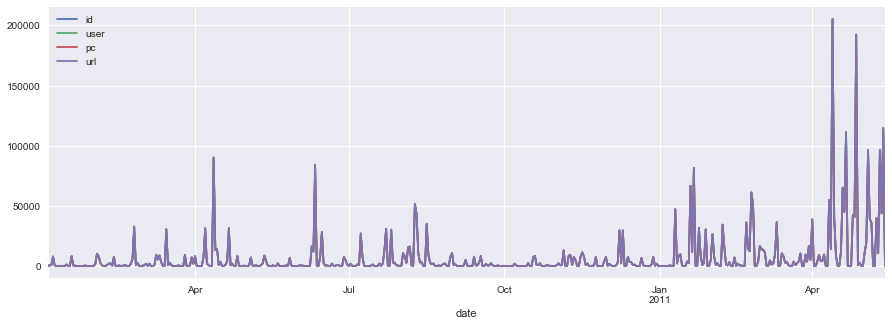

In [7]:
daily.plot(kind='line', figsize=(15,5))

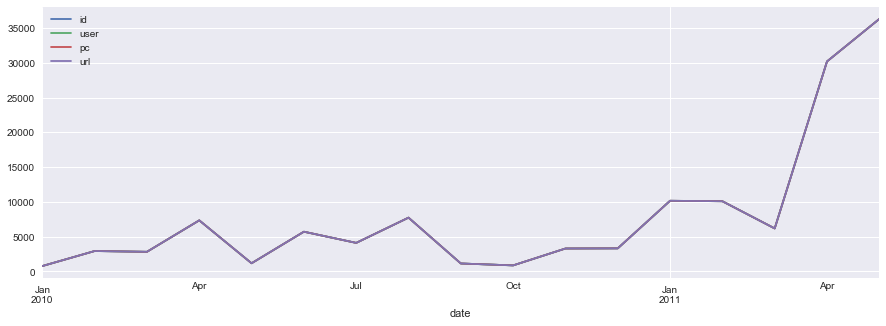

In [8]:
monthly.plot(kind='line', figsize=(15,5))

This sample is from Jan 4, 2010 - May 14, 2011

### Let's pull out a unique user and plot their activity

In [11]:
user_df = http_df[http_df['user'] == 'DTAA/AEG0905']
user_df.head()

,id,user,pc,url
date,,,,
2010-01-04 13:33:42,{B7M9-B0OA84DD-6162VMLH},DTAA/AEG0905,PC-0211,http://craigslist.org
2010-01-04 17:53:15,{M7A9-F6JI00MH-8211BUDG},DTAA/AEG0905,PC-0211,http://wine.control.org
2010-01-04 18:12:27,{V5T7-H7JN92FE-0414WNSS},DTAA/AEG0905,PC-0211,http://craigslist.org
2010-01-05 09:13:05,{K2G4-R7QI83GY-3105SRLI},DTAA/AEG0905,PC-0211,http://craigslist.org
2010-01-05 10:40:01,{Q0P0-C7ZB80JM-4344SZMG},DTAA/AEG0905,PC-0211,http://craigslist.org


In [12]:
user_df.shape

(20966, 4)

In [13]:
daily = user_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='W')).mean()

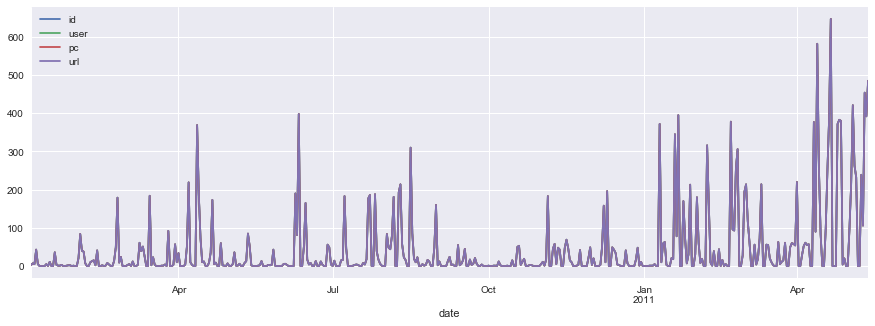

In [15]:
daily.plot(kind='line', figsize=(15,5))

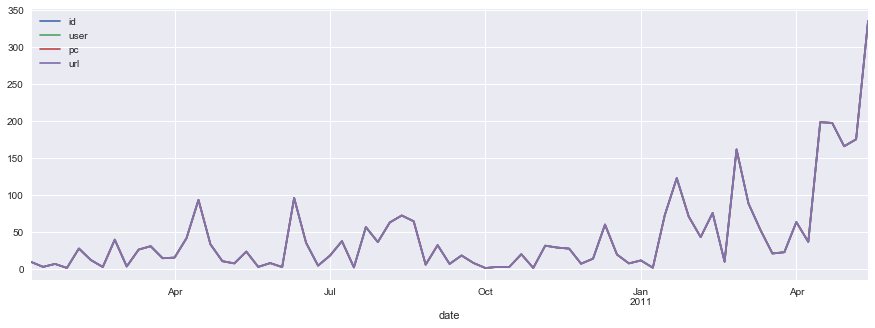

In [16]:
monthly.plot(kind='line', figsize=(15,5))

## Logon

In [17]:
def get_logon_sample():
    df = pd.read_csv('data/insider_threat/r1/logon.csv')
    df['date'] = pd.to_datetime(df.date, errors='coerce')
    df.set_index('date', inplace=True)
    return df

In [18]:
logon_df = get_logon_sample()
logon_df.head()

,id,user,pc,activity
date,,,,
2010-01-04 00:10:37,{Y6O4-A7KC67IN-0899AOZK},DTAA/KEE0997,PC-1914,Logon
2010-01-04 00:52:16,{O5Y6-O7CJ02JC-6704RWBS},DTAA/KEE0997,PC-1914,Logoff
2010-01-04 01:17:20,{D2D1-C6EB14QJ-2100RSZO},DTAA/KEE0997,PC-3363,Logon
2010-01-04 01:28:34,{H9W1-X0MC70BT-6065RPAT},DTAA/KEE0997,PC-3363,Logoff
2010-01-04 01:57:30,{H3H4-S5AZ00AZ-9560IYHC},DTAA/BJM0992,PC-3058,Logon


In [19]:
logon_df.shape

(849579, 4)

In [20]:
logon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 849579 entries, 2010-01-04 00:10:37 to 2011-05-14 06:18:12
Data columns (total 4 columns):
id          849579 non-null object
user        849579 non-null object
pc          849579 non-null object
activity    849579 non-null object
dtypes: object(4)
memory usage: 32.4+ MB


Logon data is from Jan 4, 2010 - May 14, 2011

In [21]:
logon_df.describe()

,id,user,pc,activity
count,849579,849579,849579,849579
unique,849579,1000,1100,2
top,{A4I9-G6AD77DO-1645WGGC},DTAA/CGM0994,PC-4052,Logon
freq,1,5110,1174,470877


### Aggregate Activity

In [22]:
daily = logon_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()

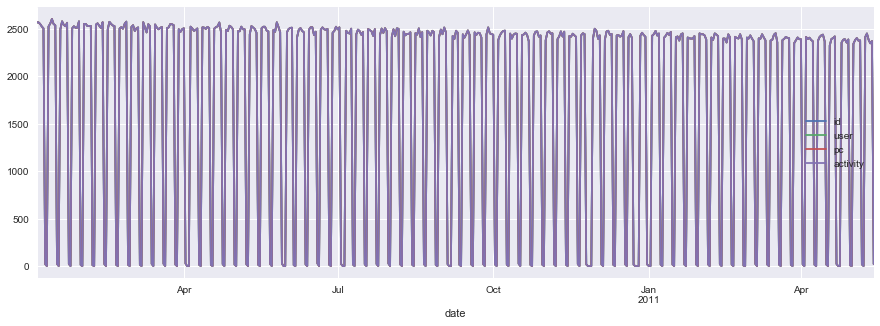

In [23]:
daily.plot(kind='line', figsize=(15,5))

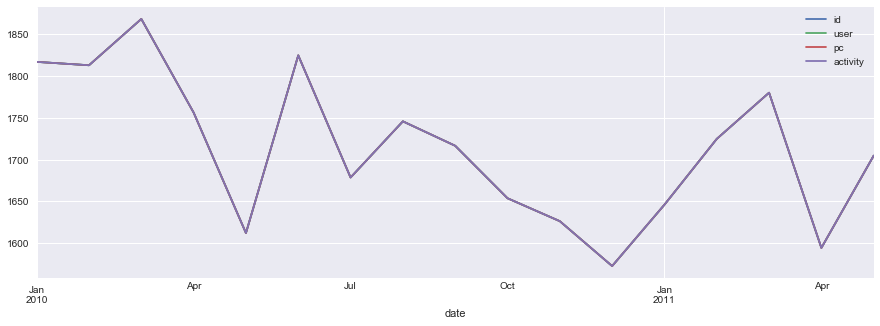

In [24]:
monthly.plot(kind='line', figsize=(15,5))

### Pull out user w/most logs

In [25]:
user_df = logon_df[logon_df['user'] == 'DTAA/CGM0994']
user_df.head()

,id,user,pc,activity
date,,,,
2010-01-04 07:34:58,{W1Z9-R1NC42MY-3248VKBM},DTAA/CGM0994,PC-3883,Logon
2010-01-04 10:50:48,{B2N8-N5IB16XO-3194NFTI},DTAA/CGM0994,PC-2469,Logon
2010-01-04 10:52:58,{D9W1-F9GY36PZ-0824MNOO},DTAA/CGM0994,PC-2469,Logoff
2010-01-04 11:57:01,{F6R8-F2QW17DO-7130JQST},DTAA/CGM0994,PC-3850,Logon
2010-01-04 12:21:29,{X9S2-R2WV39UG-3967URZX},DTAA/CGM0994,PC-3850,Logoff


In [26]:
user_df.shape

(5110, 4)

In [27]:
daily = user_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()

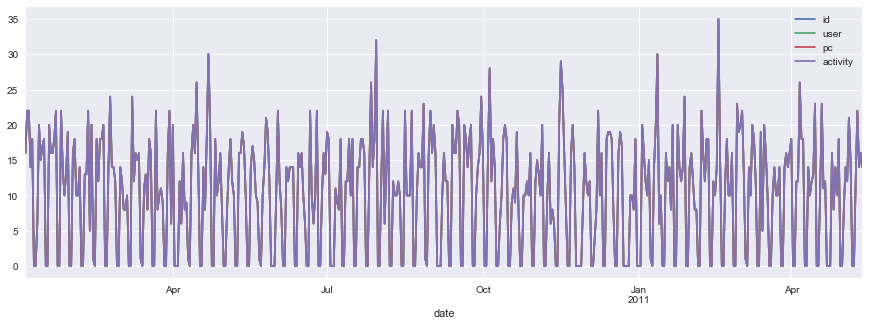

In [28]:
daily.plot(kind='line', figsize=(15,5))

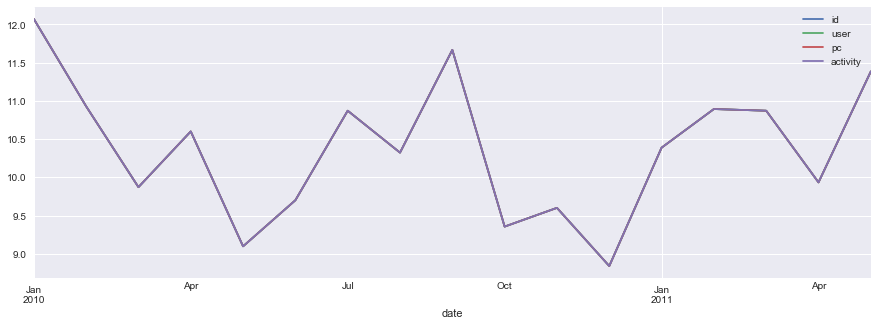

In [29]:
monthly.plot(kind='line', figsize=(15,5))

## Device

In [30]:
def get_device_sample():
    df = pd.read_csv('data/insider_threat/r1/device.csv')
    df['date'] = pd.to_datetime(df.date, errors='coerce')
    df.set_index('date', inplace=True)
    return df

In [31]:
device_df = get_device_sample()
device_df.head()

,id,user,pc,activity
date,,,,
2010-01-04 07:12:31,{S7A7-Y8QZ65MW-8738SAZP},DTAA/RES0962,PC-3736,Connect
2010-01-04 07:35:40,{G7A8-G1OB94NR-3006NTXH},DTAA/BJC0569,PC-2588,Connect
2010-01-04 08:00:38,{R3L8-N0LW95FR-8358LLXS},DTAA/EMZ0196,PC-1479,Connect
2010-01-04 08:02:14,{I2F1-B5FB51FL-3128HBUL},DTAA/ZKH0388,PC-1021,Connect
2010-01-04 08:20:17,{P7R6-C5TV18CT-1677DWWM},DTAA/RES0962,PC-3736,Disconnect


In [32]:
device_df.shape

(65668, 4)

In [33]:
device_df.describe()

,id,user,pc,activity
count,65668,65668,65668,65668
unique,65668,228,228,2
top,{H4Z7-F8KG44HG-4034UVHJ},DTAA/MQL0135,PC-4656,Connect
freq,1,678,678,34516


### Aggregate Activity

In [34]:
daily = device_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()

In [35]:
monthly.head()

,id,user,pc,activity
date,,,,
2010-01-31,138.964286,138.964286,138.964286,138.964286
2010-02-28,137.464286,137.464286,137.464286,137.464286
2010-03-31,146.451613,146.451613,146.451613,146.451613
2010-04-30,136.500000,136.500000,136.500000,136.500000
2010-05-31,127.709677,127.709677,127.709677,127.709677


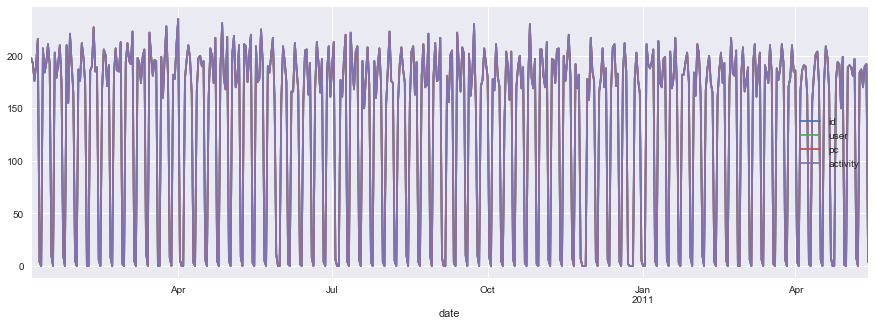

In [36]:
daily.plot(kind='line', figsize=(15,5))

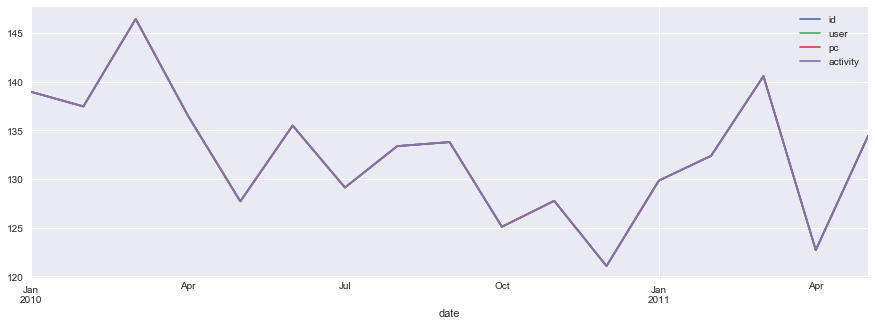

In [37]:
monthly.plot(kind='line', figsize=(15,5))

### Let's pull out a unique user and plot their activity

In [38]:
user_df = device_df[device_df['user'] == 'DTAA/MQL0135']
user_df.head()

,id,user,pc,activity
date,,,,
2010-01-04 10:45:23,{K4G2-W0DL56OV-8971UYVR},DTAA/MQL0135,PC-4656,Connect
2010-01-04 11:12:44,{A9Z3-X2ZT77RA-1517QBMP},DTAA/MQL0135,PC-4656,Disconnect
2010-01-05 11:30:01,{C4V2-P7ZW26PE-3327YJLW},DTAA/MQL0135,PC-4656,Connect
2010-01-05 13:15:29,{A2O9-Y0II23PS-8723PZEP},DTAA/MQL0135,PC-4656,Disconnect
2010-01-06 10:38:57,{H3K7-G1LL91PB-4098VVIJ},DTAA/MQL0135,PC-4656,Connect


In [39]:
user_df.shape

(678, 4)

In [40]:
daily = user_df.groupby(pd.Grouper(freq='D')).count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()

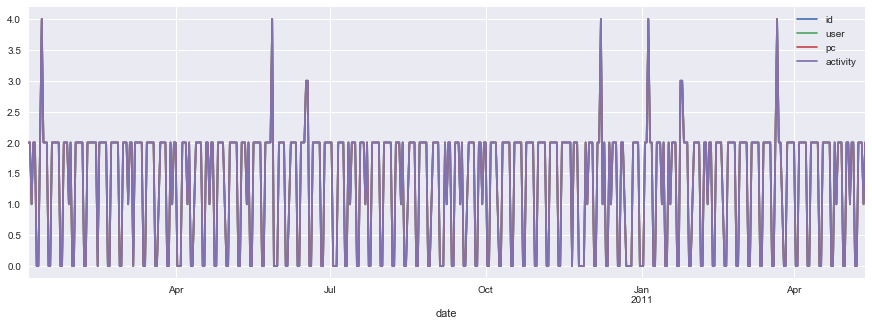

In [41]:
daily.plot(kind='line', figsize=(15,5))

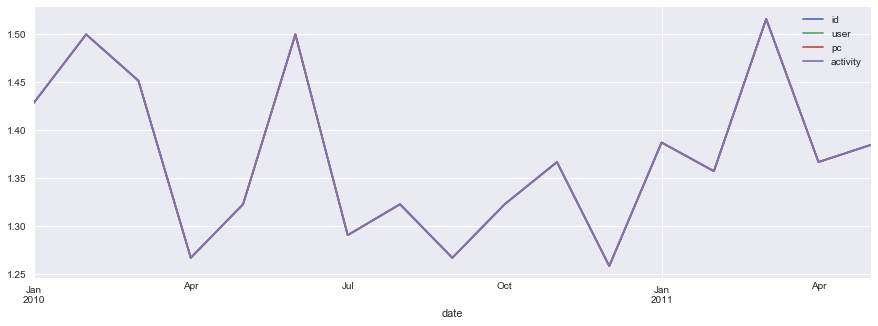

In [42]:
monthly.plot(kind='line', figsize=(15,5))

# Aggregate All Data Sources into one data frame...

timestamp (ind) | userid | data_source (http, logon, device)
